## Decission Tree

En el día de hoy implementaremos de manera práctica los conceptos de los que hablamos durante la clase de Machine Learning Basics:

Tomamos en cuenta de que el dataset que estamos empleando ya está preprocesado:

In [1]:
# En el caso de que necesites el modulo de scikit-learn (sklearn) puedes optenerlo descomentando:

# ! pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier # El arbol de decisión
from sklearn.neighbors import KNeighborsClassifier # El KNN

In [3]:
from sklearn.datasets import load_iris

# Cargar el dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Ver las primeras filas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Dataset: overview

In [4]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
29,4.7,3.2,1.6,0.2,0
45,4.8,3.0,1.4,0.3,0
39,5.1,3.4,1.5,0.2,0
10,5.4,3.7,1.5,0.2,0
81,5.5,2.4,3.7,1.0,1
106,4.9,2.5,4.5,1.7,2
70,5.9,3.2,4.8,1.8,1
145,6.7,3.0,5.2,2.3,2
0,5.1,3.5,1.4,0.2,0
73,6.1,2.8,4.7,1.2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Vemos que nuestro dataset consiste en cinco columnas:

* Longitud del Sépalo
* Ancho del Sépao
* Longitud del pétalo
* Ancho del pétalo
* Especie

Por lo que tenemos un dataset de mediciones sobre flores y su clasificación según especie

## Dataset: Features & Label

Recordamos que en un problema de calsificación tenemos un dataset en que una columna es el *label* o el parametro por el cual queremos clasificar el dataframe y el resto son los que empleamos para que el modelo sea capaz de realizar la clasificación, que llamamos *features*

En este caso emplearemos las mediciones sobre las flores para determinar de que especie se trata, por lo que hacemos la separación de ambos dataframes de tal manera que a las features las llamamos *X* y a al label *y*:

In [6]:
X = df.drop("target", axis=1)
y = df['target']

## Dataset: Test & Train

Recordamos que debemos separar los datos, una parte la emplearemos para entrenar el modelo y otra parte la emplearemos para testearlo, es decir separarlos entre train y test. Para ello emplearemos la función del módulo scikit-learn que nos lo hace automáticamente:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

## Modelos: Entrenamiento y testeo de modelos:

Los modelos que empleamos ya están implementados en muchos módulos, podemos traerlos desde dichos módulos y entrenarlos con nuestros datos:

In [8]:
# Generamos el árbol de decisión. Ponemos 1 como profundidad:
arbol_decision_1 = DecisionTreeClassifier(max_depth=1)

In [9]:
# Entrenamos el modelo pasándole los datos de entrenamiento:
arbol_decision_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [10]:
# Entrenado el modelo veamos lo bueno que es determinando el tipo de flores que tenemos dentro de la parte de test:
y_predict = arbol_decision_1.predict(X_test)

In [11]:
# Determinamos el accuracy del modelo:

arbol_decision_1.score(X_test, y_test)

0.6

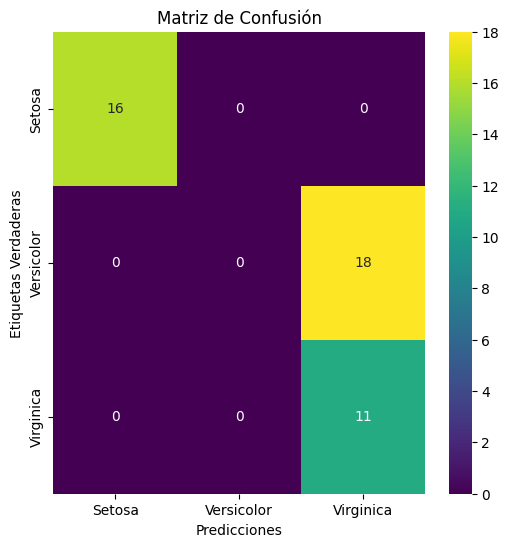

In [12]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:
'''
annot=True Escribe los números dentro de cada celda
fmt="d" num enteros
cmap="viridis" colores
'''
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [13]:
# Probamos esta vez con un árbol de decisión con una profundidad de dos:
arbol_de_decision_2 = DecisionTreeClassifier(max_depth=2)

In [14]:
arbol_de_decision_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [15]:
arbol_de_decision_2.score(X_test, y_test)


0.9111111111111111

In [16]:
y_predict = arbol_de_decision_2.predict(X_test)

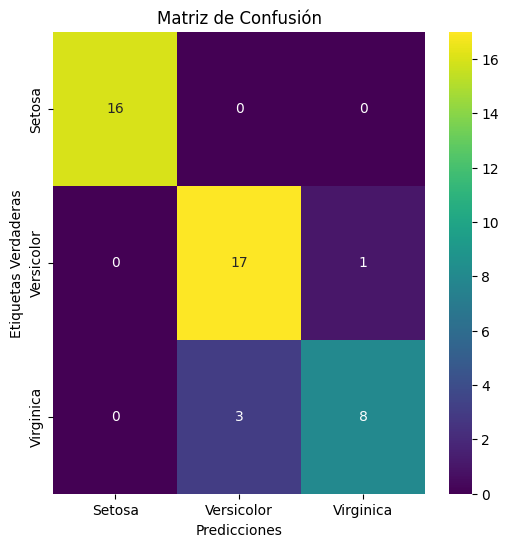

In [17]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [18]:
from sklearn.metrics import classification_report, precision_score, recall_score

print(classification_report(y_test, y_predict))

# Alta precision → pocos falsos positivos
# Alto recall → pocos falsos negativos
# suport Número real de muestras de esa clase en y_test
# accuracy: Porcentaje total de aciertos

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



In [19]:
# Probamos esta vez con un árbol de decisión con una profundidad de tres:
arbol_de_decision_3 = DecisionTreeClassifier(max_depth=3)

In [20]:
arbol_de_decision_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
arbol_de_decision_3.score(X_test, y_test)

0.9777777777777777

In [22]:
y_predict = arbol_de_decision_3.predict(X_test)

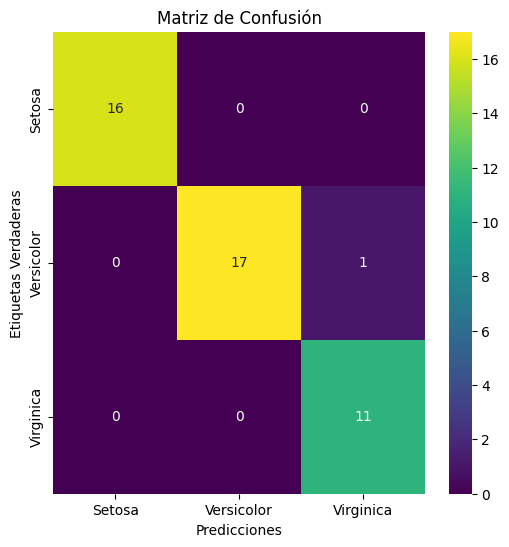

In [23]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

Determinar el mejor valor de profundidad.

In [24]:
from sklearn.model_selection import cross_val_score

X = df.drop("target", axis=1)
y = df['target']

depths = range(1,21)
scores = []


for d in depths:
  model = DecisionTreeClassifier(max_depth=d)
  cv_score = cross_val_score(model, X, y, cv=5).mean()
  scores.append(cv_score)
'''
Esto hace validación cruzada con 5 folds:Divide el dataset en 5 partes iguales
Repite 5 veces:
Usa 4 partes para entrenar
Usa 1 parte para validar
Obtiene 5 scores (uno por fold)
'''

best_depth = depths[np.argmax(scores)]
print(f"El mejor valor de profundidad es: {best_depth}")
print("CV  score:", max(scores) )


El mejor valor de profundidad es: 3
CV  score: 0.9733333333333334


In [ ]:
# Probamos con el KNN con una sola medición:
knn_1 = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
knn_1.score(X_test, y_test)

0.9777777777777777

In [28]:
y_predict = knn_1.predict(X_test)

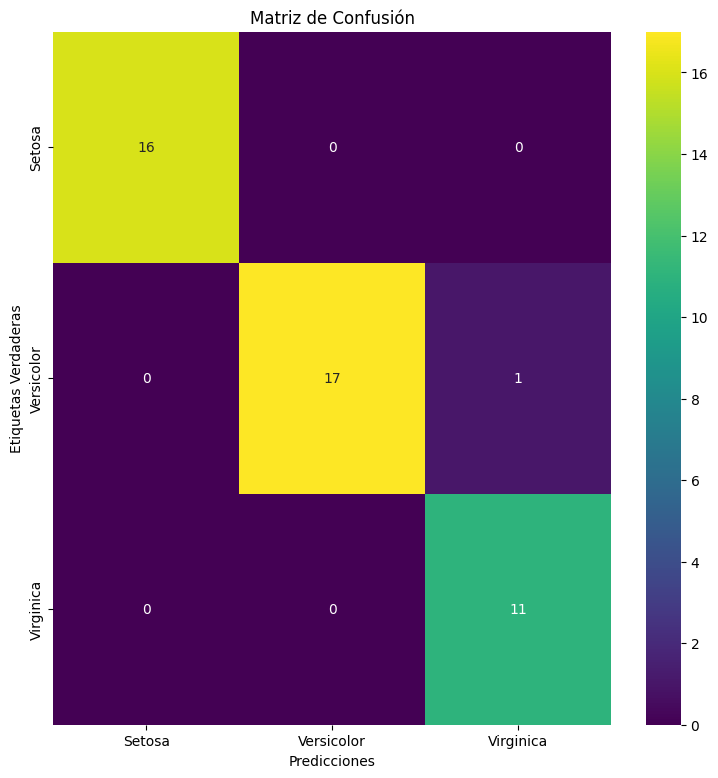

In [29]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

La precisión es: 0.9777777777777777


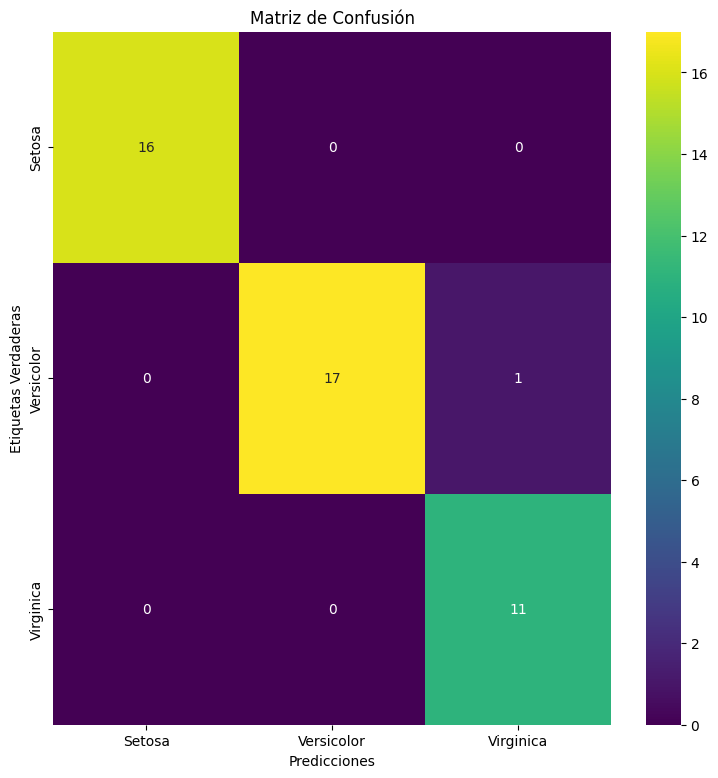

In [30]:
# Probamos con el KNN con 2 vecinos
knn_2 = KNeighborsClassifier(n_neighbors=2)

knn_2.fit(X_train, y_train)

print("La precisión es:", knn_2.score(X_test, y_test))

y_predict = knn_2.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X = df.drop("target", axis=1)
y = df['target']

k_values = range(1,21)
scores = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  cv_score = cross_val_score(model, X, y, cv=5).mean()
  scores.append(cv_score)

best_k = k_values[np.argmax(scores)]
print(f"El mejor valor de k: {best_k}")
print("Best CV score:", max(scores) )

El mejor valor de k: 6
Best CV score: 0.9800000000000001


La precisión es: 0.9777777777777777


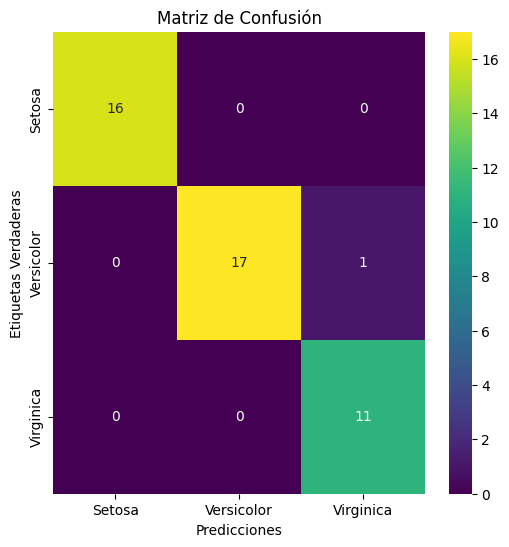

In [32]:
# Probamos con el KNN con 6 vecinos
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(X_train, y_train)

print("La precisión es:", knn_6.score(X_test, y_test))

y_predict = knn_6.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Setosa", "Versicolor", "Virginica"], yticklabels=["Setosa", "Versicolor", "Virginica"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()